In [12]:
import pandas as pd

In [13]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None) 

df = pd.read_excel('/Users/alok/Documents/coding/future climate data/past_result.xlsx')
df.head(4)

,year,"(January, mean_dbt)","(January, min_dbt)","(January, max_dbt)","(January, mean_rh)","(January, mean_ghi)","(January, 99th_percentile_ghi)","(January, mean_drsr)","(January, 99th_percentile_drsr)","(January, mean_dfhr)","(January, 99th_percentile_dfhr)","(January, mean_ws)","(February, mean_dbt)","(February, min_dbt)","(February, max_dbt)","(February, mean_rh)","(February, mean_ghi)","(February, 99th_percentile_ghi)","(February, mean_drsr)","(February, 99th_percentile_drsr)","(February, mean_dfhr)","(February, 99th_percentile_dfhr)","(February, mean_ws)","(March, mean_dbt)","(March, min_dbt)","(March, max_dbt)","(March, mean_rh)","(March, mean_ghi)","(March, 99th_percentile_ghi)","(March, mean_drsr)","(March, 99th_percentile_drsr)","(March, mean_dfhr)","(March, 99th_percentile_dfhr)","(March, mean_ws)","(April, mean_dbt)","(April, min_dbt)","(April, max_dbt)","(April, mean_rh)","(April, mean_ghi)","(April, 99th_percentile_ghi)","(April, mean_drsr)","(April, 99th_percentile_drsr)","(April, mean_dfhr)","(April, 99th_percentile_dfhr)","(April, mean_ws)","(May, mean_dbt)","(May, min_dbt)","(May, max_dbt)","(May, mean_rh)","(May, mean_ghi)","(May, 99th_percentile_ghi)","(May, mean_drsr)","(May, 99th_percentile_drsr)","(May, mean_dfhr)","(May, 99th_percentile_dfhr)","(May, mean_ws)","(June, mean_dbt)","(June, min_dbt)","(June, max_dbt)","(June, mean_rh)","(June, mean_ghi)","(June, 99th_percentile_ghi)","(June, mean_drsr)","(June, 99th_percentile_drsr)","(June, mean_dfhr)","(June, 99th_percentile_dfhr)","(June, mean_ws)","(July, mean_dbt)","(July, min_dbt)","(July, max_dbt)","(July, mean_rh)","(July, mean_ghi)","(July, 99th_percentile_ghi)","(July, mean_drsr)","(July, 99th_percentile_drsr)","(July, mean_dfhr)","(July, 99th_percentile_dfhr)","(July, mean_ws)","(August, mean_dbt)","(August, min_dbt)","(August, max_dbt)","(August, mean_rh)","(August, mean_ghi)","(August, 99th_percentile_ghi)","(August, mean_drsr)","(August, 99th_percentile_drsr)","(August, mean_dfhr)","(August, 99th_percentile_dfhr)","(August, mean_ws)","(September, mean_dbt)","(September, min_dbt)","(September, max_dbt)","(September, mean_rh)","(September, mean_ghi)","(September, 99th_percentile_ghi)","(September, mean_drsr)","(September, 99th_percentile_drsr)","(September, mean_dfhr)","(September, 99th_percentile_dfhr)","(September, mean_ws)","(October, mean_dbt)","(October, min_dbt)","(October, max_dbt)","(October, mean_rh)","(October, mean_ghi)","(October, 99th_percentile_ghi)","(October, mean_drsr)","(October, 99th_percentile_drsr)","(October, mean_dfhr)","(October, 99th_percentile_dfhr)","(October, mean_ws)","(November, mean_dbt)","(November, min_dbt)","(November, max_dbt)","(November, mean_rh)","(November, mean_ghi)","(November, 99th_percentile_ghi)","(November, mean_drsr)","(November, 99th_percentile_drsr)","(November, mean_dfhr)","(November, 99th_percentile_dfhr)","(November, mean_ws)","(December, mean_dbt)","(December, min_dbt)","(December, max_dbt)","(December, mean_rh)","(December, mean_ghi)","(December, 99th_percentile_ghi)","(December, mean_drsr)","(December, 99th_percentile_drsr)","(December, mean_dfhr)","(December, 99th_percentile_dfhr)","(December, mean_ws)"
0,Grid1000_pTRY_50th_1981-2010_lat26-39_long78-1...,14.631828,1.9,29.0,66.022849,440.935943,682.00,449.766323,680.85,193.745520,283.42,0.803710,18.710744,5.2,31.6,62.495536,433.266667,800.32,433.262238,709.61,193.486207,332.67,0.922054,24.592742,5.5,41.2,48.678763,541.467647,895.28,493.623881,752.71,210.711765,346.42,1.094624,31.166917,14.1,42.7,36.834722,576.847025,956.43,498.843931,749.00,217.380000,303.81,1.325472,35.135457,20.3,45.7,39.287634,588.617251,934.57,452.043127,693.14,237.876011,323.00,1.484570,34.598139,21.8,44.8,47.644444,535.837270,951.81,431.470255,690.43,226.314667,388.62,1.670278,29.979785,23.9,41.8,76.669355,393.961433,919.14,311.666667,669.00,233.452514,424.14,1.290591,30.308522,25.3,40.7,78.826613,329.840841,858.13,278.874251,620.14,223.379205,421.71,1.242527,28.247417,2

In [14]:
data = df[['(January, min_dbt)', '(January, max_dbt)', '(January, mean_rh)', '(January, mean_ghi)', '(February, min_dbt)', '(February, max_dbt)', '(February, mean_rh)', '(February, mean_ghi)', '(March, min_dbt)', '(March, max_dbt)', '(March, mean_rh)', '(March, mean_ghi)', '(January, min_dbt)', '(April, max_dbt)', '(April, mean_rh)', '(April, mean_ghi)', '(May, min_dbt)', '(May, max_dbt)', '(May, mean_rh)', '(May, mean_ghi)', '(June, min_dbt)', '(June, max_dbt)', '(June, mean_rh)', '(June, mean_ghi)', '(July, min_dbt)', '(July, max_dbt)', '(July, mean_rh)', '(July, mean_ghi)', '(August, min_dbt)', '(August, max_dbt)', '(August, mean_rh)', '(August, mean_ghi)', '(September, min_dbt)', '(September, max_dbt)', '(September, mean_rh)', '(September, mean_ghi)', '(October, min_dbt)', '(October, max_dbt)', '(October, mean_rh)', '(October, mean_ghi)', '(November, min_dbt)', '(November, max_dbt)', '(November, mean_rh)', '(November, mean_ghi)', '(December, min_dbt)', '(December, max_dbt)', '(December, mean_rh)', '(December, mean_ghi)']]

In [15]:
from sklearn.preprocessing import StandardScaler
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [16]:
#PCA




import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=5)
X_pca = pca.fit_transform(data_scaled)
pca.explained_variance_ratio_
np.cumsum(pca.explained_variance_ratio_)

array([0.30158609, 0.54282946, 0.68876542, 0.76797822, 0.81263218])

In [17]:
print(X_pca.shape)

(4790, 5)


In [142]:
np.save("pca_transformed_data.npy", X_pca)

Shape of PCA-transformed data: (4790, 5)


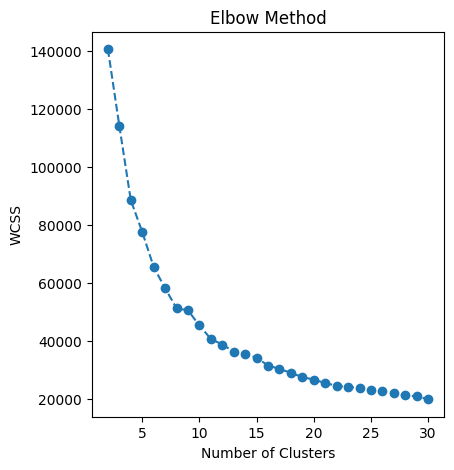

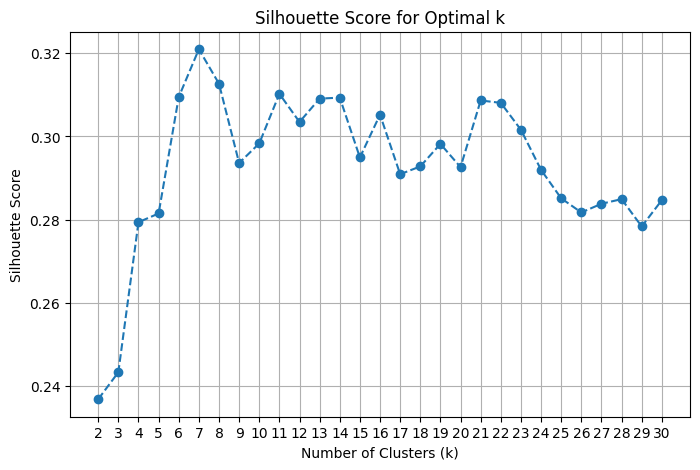

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Load the saved PCA-transformed data
X_pca = np.load("pca_transformed_data.npy")  # Load the 5 PCs
print(f"Shape of PCA-transformed data: {X_pca.shape}")

# Step 2: Use the Elbow Method to find the optimal number of clusters
wcss = []  # Within-Cluster-Sum-of-Squares
silhouette_scores = []
max_clusters = 30  # Test up to 10 clusters

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS
    silhouette_scores.append(silhouette_score(X_pca, kmeans.labels_))

# Plot the Elbow Method graph
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.figure(figsize=(8, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, max_clusters + 1))  # Add this line to show all integer values on the x-axis
plt.grid(True)
plt.show()

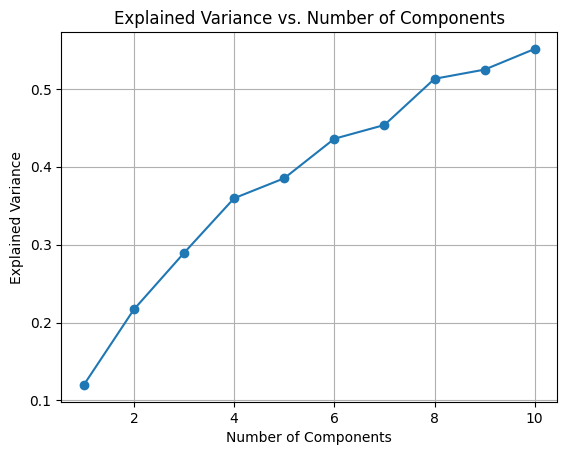

In [144]:
from sklearn.decomposition import KernelPCA
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Example: X is your normalized data
explained_variances = []
max_components = 10  # Test up to 10 components

for n in range(1, max_components + 1):
    kpca = KernelPCA(n_components=n, kernel='rbf', gamma=0.1, fit_inverse_transform=True)  # Set fit_inverse_transform=True
    X_kpca = kpca.fit_transform(data_scaled)
    X_reconstructed = kpca.inverse_transform(X_kpca)  # Now this will work
    reconstruction_error = mean_squared_error(data_scaled, X_reconstructed)
    explained_variances.append(1 - reconstruction_error / np.var(data_scaled))

# Plot explained variance
plt.plot(range(1, max_components + 1), explained_variances, marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

In [145]:
explained_variances = []
max_components = 10

for n in range(1, max_components + 1):
    kpca = KernelPCA(n_components=n, kernel='rbf', gamma=0.1, fit_inverse_transform=True)
    X_kpca = kpca.fit_transform(data_scaled)
    X_reconstructed = kpca.inverse_transform(X_kpca)
    reconstruction_error = mean_squared_error(data_scaled, X_reconstructed)
    explained_variances.append(1 - reconstruction_error / np.var(data_scaled))

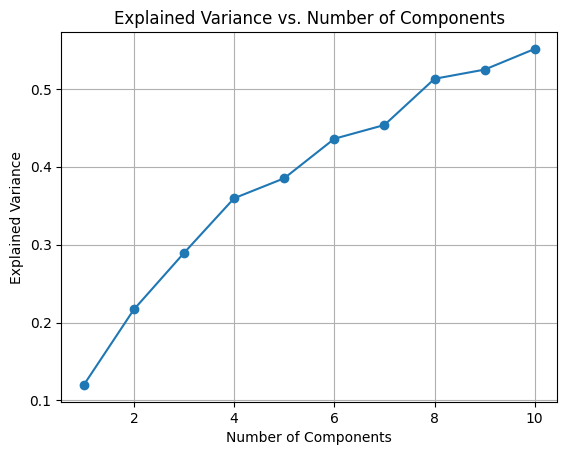

In [146]:
plt.plot(range(1, max_components + 1), explained_variances, marker='o')
plt.title('Explained Variance vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.grid(True)
plt.show()

In [147]:
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

# Example: X is your normalized data
# X = np.load("your_data.npy")  # Replace with your data

# Define the pipeline
pipeline = Pipeline([
    ('kpca', KernelPCA()),  # Kernel PCA step
    ('kmeans', KMeans(random_state=42))  # K-Means clustering step
])

# Define the parameter grid for grid search
param_grid = {
    'kpca__n_components': range(2, 11),  # n_components from 2 to 10
    'kpca__kernel': ['rbf', 'poly'],  # Kernels to try
    'kpca__gamma': [0.1, 0.01, 0.001],  # Gamma values to try
    'kpca__degree': [2, 3],  # Degree for polynomial kernel (ignored for other kernels)
    'kmeans__n_clusters': range(2, 23)  # Number of clusters from 2 to 30
}

# Define a custom scorer for clustering
def clustering_scorer(estimator, X):
    X_transformed = estimator.named_steps['kpca'].transform(X)
    clusters = estimator.named_steps['kmeans'].predict(X_transformed)
    return silhouette_score(X_transformed, clusters)

# Perform grid search
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring=clustering_scorer,  # Use Silhouette Score for evaluation
    cv=3,  # 3-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)

# Fit the grid search to the data
grid_search.fit(data_scaled)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Silhouette Score:", grid_search.best_score_)

# Access the best model
best_model = grid_search.best_estimator_

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "/var/folders/5c/_4ry2yqx0jz_vdrxpp6sf8800000gn/T/ipykernel_1391/1999679946.py", line 30, in clustering_scorer
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/cluster/_unsupervised.py", line 139, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metr

KeyboardInterrupt: 

In [43]:
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score

# Example: X is your normalized data
# X = np.load("your_data.npy")  # Replace with your data

# Define the pipeline
pipeline = Pipeline([
    ('kpca', KernelPCA()),  # Kernel PCA step
    ('kmeans', KMeans(n_clusters=8, random_state=42))  # K-Means clustering step
])

# Define the parameter grid for grid search
param_grid = {
    'kpca__n_components': [5],  # n_components from 2 to 10
    'kpca__kernel': ['poly'],  # Kernels to try
    'kpca__gamma': np.linspace(0.01, 0.1, 20),  # Gamma values to try
    # 'kpca__degree': [2, 3],  # Degree for polynomial kernel (ignored for other kernels)
    # 'kmeans__n_clusters': range(2, 23)  # Number of clusters from 2 to 30
}

# Define a custom scorer for clustering
def clustering_scorer(estimator, X):
    X_transformed = estimator.named_steps['kpca'].transform(X)
    clusters = estimator.named_steps['kmeans'].predict(X_transformed)
    return silhouette_score(X_transformed, clusters)

# Perform grid search
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring=clustering_scorer,  # Use Silhouette Score for evaluation
    cv=3,  # 3-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)

# Fit the grid search to the data
grid_search.fit(data_scaled)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Silhouette Score:", grid_search.best_score_)

# Access the best model
best_model = grid_search.best_estimator_

Best Parameters: {'kpca__gamma': 0.1, 'kpca__kernel': 'poly', 'kpca__n_components': 5}
Best Silhouette Score: 0.6392817668647709


In [45]:
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
import pandas as pd

# Example: X is your normalized data
# X = np.load("your_data.npy")  # Replace with your data

# Define the pipeline
pipeline = Pipeline([
    ('kpca', KernelPCA()),  # Kernel PCA step
    ('kmeans', KMeans(random_state=42))  # K-Means clustering step
])

# Define the parameter grid for grid search
param_grid = {
    'kpca__n_components': range(2, 11),  # n_components from 2 to 10
    'kpca__kernel': ['rbf', 'poly'],  # Kernels to try
    'kpca__gamma': [0.1, 0.01, 0.001],  # Gamma values to try
    'kpca__degree': [2, 3],  # Degree for polynomial kernel (ignored for other kernels)
    'kmeans__n_clusters': range(2, 23)  # Number of clusters from 2 to 30
}

# Define a custom scorer for clustering
def clustering_scorer(estimator, X):
    X_transformed = estimator.named_steps['kpca'].transform(X)
    clusters = estimator.named_steps['kmeans'].predict(X_transformed)
    return silhouette_score(X_transformed, clusters)

# Perform grid search
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring=clustering_scorer,  # Use Silhouette Score for evaluation
    cv=3,  # 3-fold cross-validation
    n_jobs=-1  # Use all available CPU cores
)

# Fit the grid search to the data
grid_search.fit(data_scaled)

# Print the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Silhouette Score:", grid_search.best_score_)

# Access the best model
best_model = grid_search.best_estimator_

# Extract and display the top 10 results
results = pd.DataFrame(grid_search.cv_results_)
top_10_results = results.sort_values(by='mean_test_score', ascending=False).head(10)

# Display the top 10 results
print("\nTop 10 Results:")
print(top_10_results[['params', 'mean_test_score', 'std_test_score']])

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
  File "/var/folders/5c/_4ry2yqx0jz_vdrxpp6sf8800000gn/T/ipykernel_1391/3323519478.py", line 31, in clustering_scorer
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/metrics/cluster/_unsupervised.py", line 139, in silhouette_score
    return np.mean(silhouette_samples(X, labels, metric=metr

Best Parameters: {'kmeans__n_clusters': 2, 'kpca__degree': 3, 'kpca__gamma': 0.1, 'kpca__kernel': 'poly', 'kpca__n_components': 2}
Best Silhouette Score: 0.9118236118066275

Top 10 Results:
                                                params  mean_test_score  \
63   {'kmeans__n_clusters': 2, 'kpca__degree': 3, '...         0.911824   
65   {'kmeans__n_clusters': 2, 'kpca__degree': 3, '...         0.896418   
66   {'kmeans__n_clusters': 2, 'kpca__degree': 3, '...         0.839327   
64   {'kmeans__n_clusters': 2, 'kpca__degree': 3, '...         0.838048   
175  {'kmeans__n_clusters': 3, 'kpca__degree': 3, '...         0.819647   
176  {'kmeans__n_clusters': 3, 'kpca__degree': 3, '...         0.780330   
172  {'kmeans__n_clusters': 3, 'kpca__degree': 3, '...         0.770980   
171  {'kmeans__n_clusters': 3, 'kpca__degree': 3, '...         0.767184   
174  {'kmeans__n_clusters': 3, 'kpca__degree': 3, '...         0.759508   
70   {'kmeans__n_clusters': 2, 'kpca__degree': 3, '...      

In [46]:
from sklearn.decomposition import KernelPCA
import numpy as np

# Example: X is your normalized data
# X = np.load("your_data.npy")  # Replace with your data

# Step 1: Initialize Kernel PCA with the best parameters
kpca = KernelPCA(
    n_components=5,  # Number of components
    kernel='poly',   # Polynomial kernel
    gamma=0.1,       # Gamma value
    degree=2,        # Degree of the polynomial (default is 2)
    coef0=1          # Constant term for polynomial kernel (default is 1)
)

# Step 2: Fit and transform the data
X_kpca = kpca.fit_transform(data_scaled)

# Step 3: Use the transformed data for further analysis
print("Transformed Data Shape:", X_kpca.shape)
print("First 5 Rows of Transformed Data:\n", X_kpca[:5])

Transformed Data Shape: (4790, 5)
First 5 Rows of Transformed Data:
 [[-0.96787596 -0.02318404 -1.38078843 -0.24242594 -0.15166892]
 [-0.99661975  0.3480355  -1.61080398 -0.43837545 -0.27649892]
 [-0.87692286  0.02299863 -1.47486841 -0.27746713 -0.48803401]
 [-0.86175721 -0.04607897 -1.4625193  -0.2183232  -0.39047478]
 [-0.84833288 -0.09094892 -1.42723976 -0.20715739 -0.39500343]]


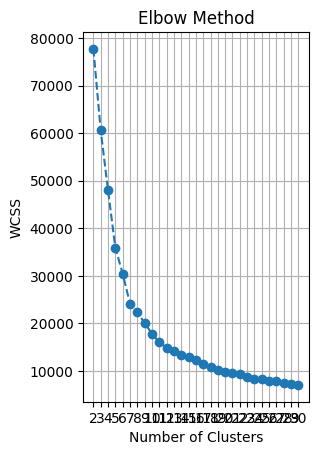

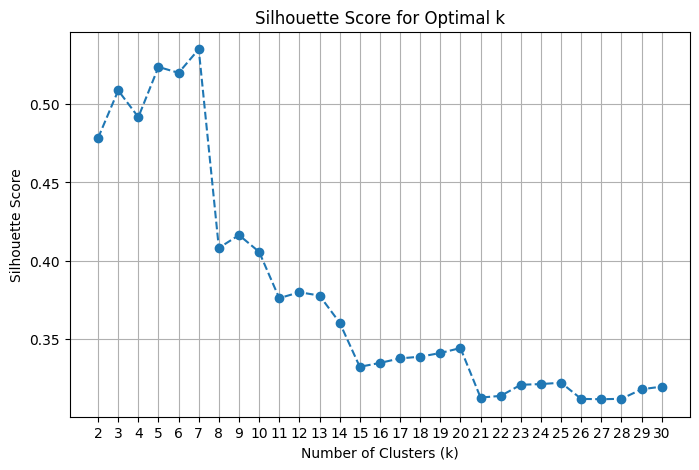

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Use the Elbow Method to find the optimal number of clusters
wcss = []  # Within-Cluster-Sum-of-Squares
silhouette_scores = []
max_clusters = 30  # Test up to 30 clusters

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_kpca)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS
    silhouette_scores.append(silhouette_score(X_kpca, kmeans.labels_))

# Plot the Elbow Method graph
plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.xticks(range(2, max_clusters + 1))  # Set x-axis ticks explicitly
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)  # Add grid for better readability

plt.figure(figsize=(8, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, max_clusters + 1))  # Add this line to show all integer values on the x-axis
plt.grid(True)
plt.show()

In [49]:
#DBSCAN

In [150]:
X = np.load("pca_transformed_data.npy")

Best Parameters:
{'eps': 2.2473684210526317, 'min_samples': 7, 'metric': 'euclidean', 'algorithm': 'auto'}
Best Silhouette Score: 0.3824

Top 10 Results:
           eps  min_samples     metric  algorithm  silhouette_score
860   2.247368            7  euclidean       auto          0.382358
863   2.247368            7  euclidean      brute          0.382358
862   2.247368            7  euclidean    kd_tree          0.382358
861   2.247368            7  euclidean  ball_tree          0.382358
1004  2.500000            9  euclidean       auto          0.377464
1007  2.500000            9  euclidean      brute          0.377464
1006  2.500000            9  euclidean    kd_tree          0.377464
1005  2.500000            9  euclidean  ball_tree          0.377464
935   2.373684            8  euclidean      brute          0.375183
934   2.373684            8  euclidean    kd_tree          0.375183


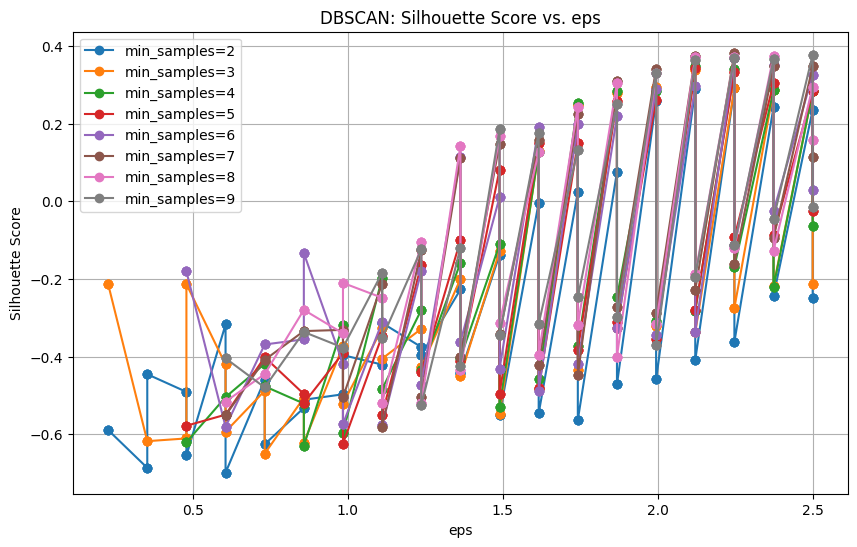

In [152]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example: X is your normalized data
X = np.load("pca_transformed_data.npy")  # Replace with your data

# Define the parameter grid for DBSCAN
eps_values = np.linspace(0.1, 2.5, 20)  # Range of eps values
min_samples_values = range(2, 10)  # Range of min_samples values
metric_values = ['euclidean', 'manhattan', 'cosine']  # Distance metrics to try
algorithm_values = ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithms to try

# Initialize variables to store results
best_score = -1
best_params = {}
results = []

# Perform grid search over eps, min_samples, metric, and algorithm
for eps in eps_values:
    for min_samples in min_samples_values:
        for metric in metric_values:
            for algorithm in algorithm_values:
                # Skip unsupported combinations
                if algorithm in ['ball_tree', 'kd_tree'] and metric == 'cosine':
                    continue  # Skip cosine metric for ball_tree and kd_tree

                # Apply DBSCAN
                dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric, algorithm=algorithm)
                labels = dbscan.fit_predict(X)

                # Skip if all points are noise (label = -1) or only one cluster is found
                if len(np.unique(labels)) < 2:
                    continue

                # Calculate Silhouette Score
                score = silhouette_score(X, labels)
                results.append((eps, min_samples, metric, algorithm, score))

                # Update best parameters
                if score > best_score:
                    best_score = score
                    best_params = {'eps': eps, 'min_samples': min_samples, 'metric': metric, 'algorithm': algorithm}

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results, columns=['eps', 'min_samples', 'metric', 'algorithm', 'silhouette_score'])

# Print the best parameters and score
print("Best Parameters:")
print(best_params)
print(f"Best Silhouette Score: {best_score:.4f}")

# Display the top 10 results
print("\nTop 10 Results:")
print(results_df.sort_values(by='silhouette_score', ascending=False).head(10))

import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(10, 6))
for min_samples in min_samples_values:
    # Filter results for the current min_samples
    subset = results_df[results_df['min_samples'] == min_samples]
    
    # Extract eps and scores for the current min_samples
    eps_subset = subset['eps']
    scores_subset = subset['silhouette_score']
    
    # Plot only if there are valid results
    if len(eps_subset) > 0:
        plt.plot(eps_subset, scores_subset, marker='o', label=f'min_samples={min_samples}')

plt.title('DBSCAN: Silhouette Score vs. eps')
plt.xlabel('eps')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

In [161]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt

# Example: X is your data with 5 principal components
# X = np.load("pca_transformed_data.npy")  # Replace with your data

# Best parameters
best_params = {
    'eps': 2.2473684210526317,
    'min_samples': 7,
    'metric': 'euclidean',
    'algorithm': 'auto'
}

# Step 1: Run DBSCAN with the best parameters
dbscan = DBSCAN(eps=best_params['eps'], min_samples=best_params['min_samples'],
                metric=best_params['metric'], algorithm=best_params['algorithm'])
labels = dbscan.fit_predict(X)  # Use X (5 PCs) instead of data_scaled

# Step 2: Count the number of clusters (excluding noise)
n_clusters = len(np.unique(labels)) - (1 if -1 in labels else 0)  # Subtract 1 if noise is present
n_noise = np.sum(labels == -1)  # Count the number of noise points

print(f"Number of clusters found: {n_clusters}")
print(f"Number of noise points: {n_noise}")

# Step 3: Evaluate cluster quality
if n_clusters > 1:  # Ensure there are at least two clusters
    silhouette_avg = silhouette_score(X, labels)  # Use X (5 PCs) instead of data_scaled
    davies_bouldin_avg = davies_bouldin_score(X, labels)  # Use X (5 PCs) instead of data_scaled
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_avg:.4f}")
else:
    print("Not enough clusters to compute evaluation metrics.")

# Step 4: Visualize the clusters (if data is 2D or 3D)
if X.shape[1] == 2:  # 2D data
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
    plt.title('DBSCAN Clustering (2D)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster')
    plt.show()
elif X.shape[1] == 3:  # 3D data
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels, cmap='viridis', s=50)
    ax.set_title('DBSCAN Clustering (3D)')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.show()

Number of clusters found: 1
Number of noise points: 26
Not enough clusters to compute evaluation metrics.


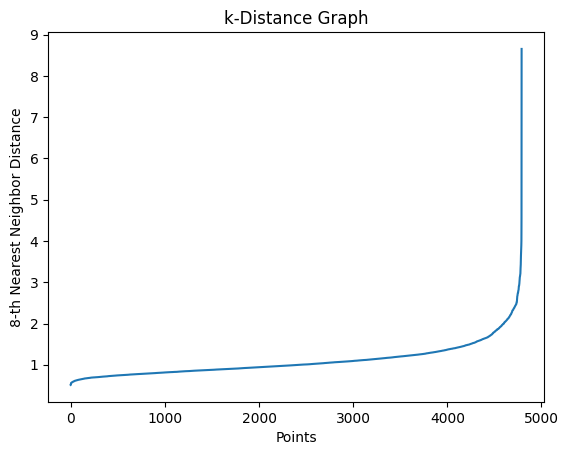

In [151]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

min_samples = 8  # Set min_samples to the same value used in DBSCAN
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort distances
distances = np.sort(distances[:, min_samples-1], axis=0)

# Plot the k-distance graph
plt.plot(distances)
plt.title('k-Distance Graph')
plt.xlabel('Points')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.show()

In [110]:
#HDBSCAN

In [162]:
import hdbscan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Example: X is your normalized data
# X = np.load("your_data.npy")  # Replace with your data

# Step 1: Define the parameter grid for HDBSCAN
min_cluster_size_values = range(5, 20)  # Minimum cluster size to try
min_samples_values = range(1, 10)  # Minimum samples to try

# Initialize variables to store results
best_score = -1
best_params = {}
results = []

# Perform grid search over min_cluster_size and min_samples
for min_cluster_size in min_cluster_size_values:
    for min_samples in min_samples_values:
        # Apply HDBSCAN
        clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
        labels = clusterer.fit_predict(X)

        # Skip if all points are noise (label = -1) or only one cluster is found
        if len(np.unique(labels)) < 2:
            continue

        # Calculate Silhouette Score
        score = silhouette_score(X, labels)
        results.append((min_cluster_size, min_samples, score))

        # Update best parameters
        if score > best_score:
            best_score = score
            best_params = {'min_cluster_size': min_cluster_size, 'min_samples': min_samples}

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results, columns=['min_cluster_size', 'min_samples', 'silhouette_score'])

# Print the best parameters and score
print("Best Parameters:")
print(best_params)
print(f"Best Silhouette Score: {best_score:.4f}")

# Display the top 10 results
print("\nTop 10 Results:")
print(results_df.sort_values(by='silhouette_score', ascending=False).head(10))

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/pytho

Best Parameters:
{'min_cluster_size': 12, 'min_samples': 1}
Best Silhouette Score: 0.3437

Top 10 Results:
     min_cluster_size  min_samples  silhouette_score
81                 14            1          0.343725
99                 16            1          0.343725
63                 12            1          0.343725
72                 13            1          0.343725
90                 15            1          0.343725
117                18            1          0.343725
108                17            1          0.343725
91                 15            2          0.306350
109                17            2          0.306350
82                 14            2          0.306350


In [164]:
# Step 2: Run HDBSCAN with the best parameters
best_clusterer = hdbscan.HDBSCAN(min_cluster_size=12,
                                min_samples=1)
best_labels = best_clusterer.fit_predict(X)

# Step 3: Evaluate cluster quality
if len(np.unique(best_labels)) > 1:  # Ensure there are at least two clusters
    silhouette_avg = silhouette_score(X, best_labels)
    davies_bouldin_avg = davies_bouldin_score(X, best_labels)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin_avg:.4f}")
else:
    print("Not enough clusters to compute evaluation metrics.")

# Step 4: Visualize the clusters (if data is 2D or 3D)
if X.shape[1] == 2:  # 2D data
    plt.scatter(X[:, 0], X[:, 1], c=best_labels, cmap='viridis', s=50)
    plt.title('HDBSCAN Clustering (2D)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar(label='Cluster')
    plt.show()
elif X.shape[1] == 3:  # 3D data
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=best_labels, cmap='viridis', s=50)
    ax.set_title('HDBSCAN Clustering (3D)')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    plt.show()

Silhouette Score: 0.3437
Davies-Bouldin Index: 1.6554


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [165]:
import hdbscan
import numpy as np

# Assuming X is your dataset
# X = np.load("your_data.npy")  # Replace with your data

# Step 1: Fit HDBSCAN with the given parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size=12, min_samples=1)
labels = clusterer.fit_predict(X)

# Step 2: Count the number of clusters (excluding noise)
unique_clusters = np.unique(labels)  # Get unique cluster labels
num_clusters = len(unique_clusters) - 1 if -1 in unique_clusters else len(unique_clusters)

# Step 3: Print the results
print("Cluster Labels:", labels)
print("Unique Clusters:", unique_clusters)
print("Number of Clusters Formed:", num_clusters)

Cluster Labels: [1 1 1 ... 1 1 1]
Unique Clusters: [-1  0  1]
Number of Clusters Formed: 2


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [166]:
from sklearn.metrics import silhouette_score

# Define parameter grid
min_cluster_size_values = range(5, 20)  # Example range
min_samples_values = range(1, 10)  # Example range

# Initialize variables to store results
best_score = -1
best_params = {}

# Perform grid search
for min_cluster_size in min_cluster_size_values:
    for min_samples in min_samples_values:
        clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples, cluster_selection_method='eom', metric='manhattan')
        labels = clusterer.fit_predict(X)

        # Skip if all points are noise or only one cluster is found
        if len(np.unique(labels)) < 2:
            continue

        # Calculate Silhouette Score
        score = silhouette_score(X, labels)

        # Update best parameters
        if score > best_score:
            best_score = score
            best_params = {'min_cluster_size': min_cluster_size, 'min_samples': min_samples}

print("Best Parameters:", best_params)
print(f"Best Silhouette Score: {best_score:.4f}")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/pytho

Best Parameters: {'min_cluster_size': 12, 'min_samples': 1}
Best Silhouette Score: 0.3017


In [167]:
import hdbscan
import numpy as np

# Assuming X is your dataset
# X = np.load("your_data.npy")  # Replace with your data

# Step 1: Fit HDBSCAN with the given parameters
clusterer = hdbscan.HDBSCAN(min_cluster_size=12, min_samples=1, cluster_selection_method='eom', metric='manhattan')
labels = clusterer.fit_predict(X)

# Step 2: Count the number of clusters (excluding noise)
unique_clusters = np.unique(labels)  # Get unique cluster labels
num_clusters = len(unique_clusters) - 1 if -1 in unique_clusters else len(unique_clusters)

# Step 3: Print the results
print("Cluster Labels:", labels)
print("Unique Clusters:", unique_clusters)
print("Number of Clusters Formed:", num_clusters)

Cluster Labels: [1 1 1 ... 1 1 1]
Unique Clusters: [-1  0  1]
Number of Clusters Formed: 2


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [107]:
#HIERARCHICAL

Best Parameters:
{'n_clusters': 2, 'metric': 'euclidean', 'linkage': 'average'}
Best Silhouette Score: 0.5059

Top 10 Results:
    n_clusters     metric   linkage  silhouette_score
2            2  euclidean   average          0.505923
3            2  euclidean    single          0.505923
5            2  manhattan   average          0.505923
6            2  manhattan    single          0.505923
12           3  euclidean   average          0.379234
1            2  euclidean  complete          0.346279
16           3  manhattan    single          0.295578
70           9  euclidean      ward          0.268670
80          10  euclidean      ward          0.263452
15           3  manhattan   average          0.263017


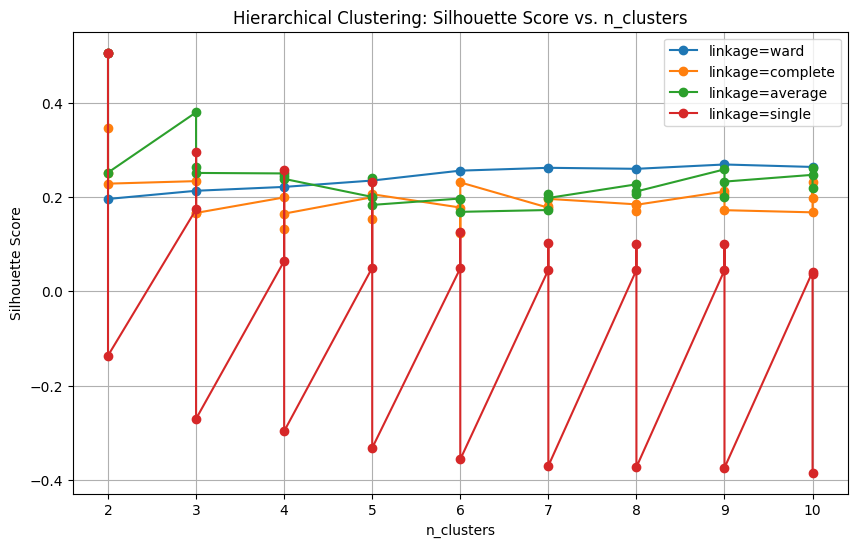

In [168]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example: X is your normalized data
# X = np.load("your_data.npy")  # Replace with your data

# Define the parameter grid for hierarchical clustering
n_clusters_values = range(2, 11)  # Number of clusters to try (2 to 10)
metric_values = ['euclidean', 'manhattan', 'cosine']  # Distance metrics to try
linkage_values = ['ward', 'complete', 'average', 'single']  # Linkage criteria to try

# Initialize variables to store results
best_score = -1
best_params = {}
results = []

# Perform grid search over n_clusters, metric, and linkage
for n_clusters in n_clusters_values:
    for metric in metric_values:
        for linkage in linkage_values:
            # Skip unsupported combinations
            if linkage == 'ward' and metric != 'euclidean':
                continue  # Ward linkage only works with Euclidean distance

            # Apply Agglomerative Clustering
            agglo = AgglomerativeClustering(n_clusters=n_clusters, metric=metric, linkage=linkage)
            labels = agglo.fit_predict(X)

            # Skip if all points are in one cluster
            if len(np.unique(labels)) < 2:
                continue

            # Calculate Silhouette Score
            score = silhouette_score(X, labels)
            results.append((n_clusters, metric, linkage, score))

            # Update best parameters
            if score > best_score:
                best_score = score
                best_params = {'n_clusters': n_clusters, 'metric': metric, 'linkage': linkage}

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results, columns=['n_clusters', 'metric', 'linkage', 'silhouette_score'])

# Print the best parameters and score
print("Best Parameters:")
print(best_params)
print(f"Best Silhouette Score: {best_score:.4f}")

# Display the top 10 results
print("\nTop 10 Results:")
print(results_df.sort_values(by='silhouette_score', ascending=False).head(10))

# Plot the results
plt.figure(figsize=(10, 6))
for linkage in linkage_values:
    # Filter results for the current linkage
    subset = results_df[results_df['linkage'] == linkage]
    
    # Extract n_clusters and scores for the current linkage
    n_clusters_subset = subset['n_clusters']
    scores_subset = subset['silhouette_score']
    
    # Plot only if there are valid results
    if len(n_clusters_subset) > 0:
        plt.plot(n_clusters_subset, scores_subset, marker='o', label=f'linkage={linkage}')

plt.title('Hierarchical Clustering: Silhouette Score vs. n_clusters')
plt.xlabel('n_clusters')
plt.ylabel('Silhouette Score')
plt.xticks(n_clusters_values)  # Ensure x-axis ticks are integers
plt.legend()
plt.grid(True)
plt.show()

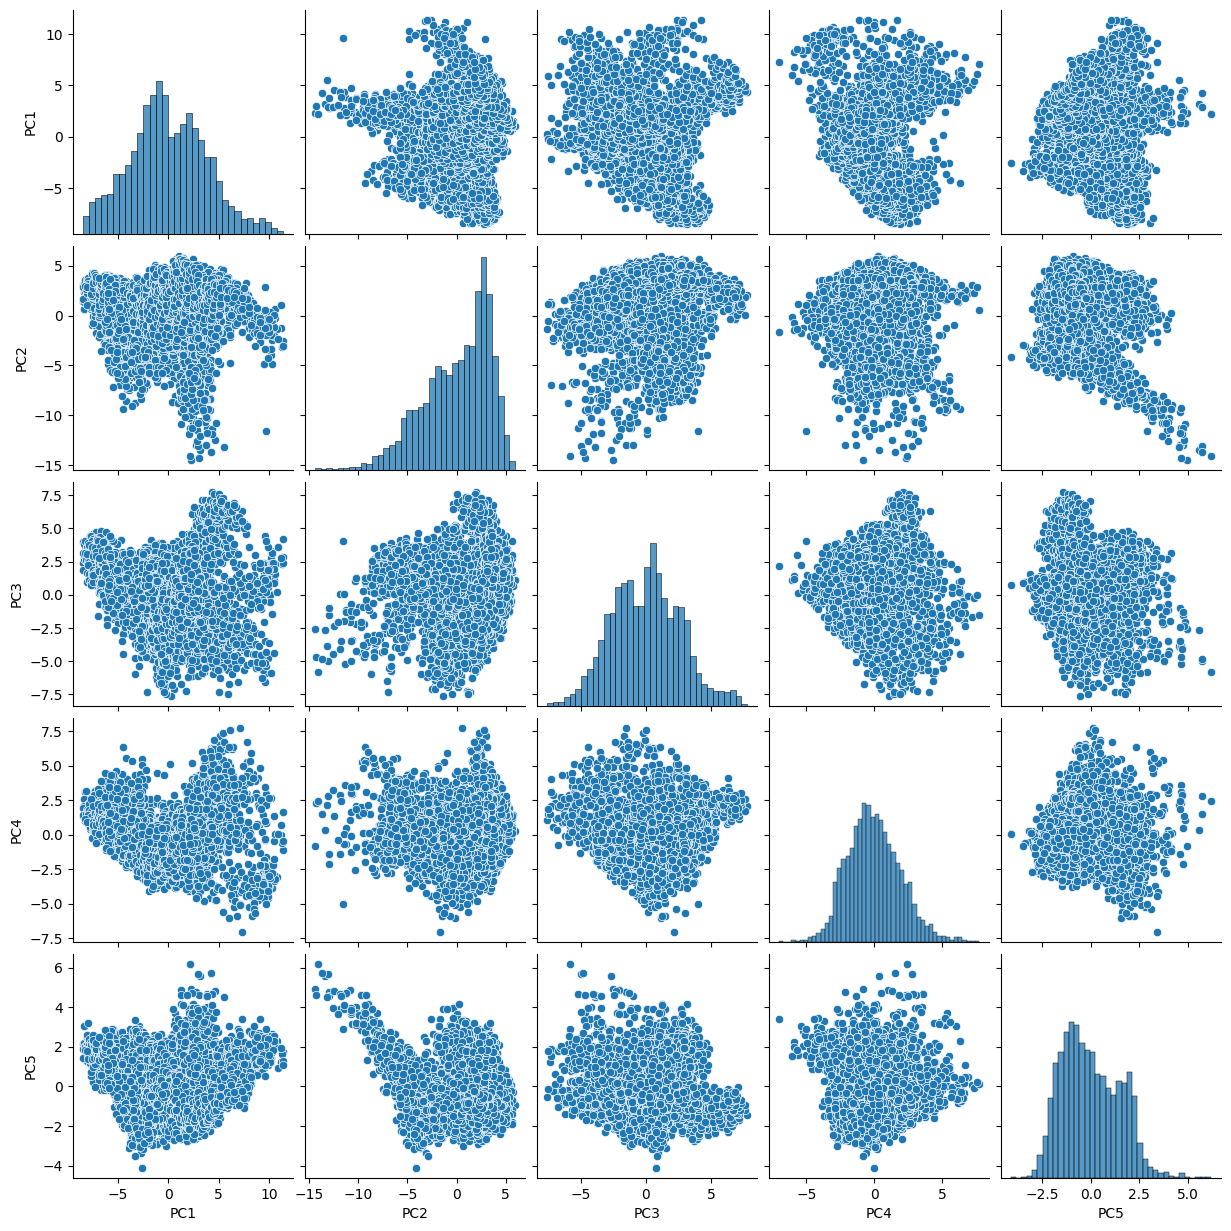

In [169]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to a DataFrame for easier plotting
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

# Create pairwise scatter plots
sns.pairplot(df_pca)
plt.show()

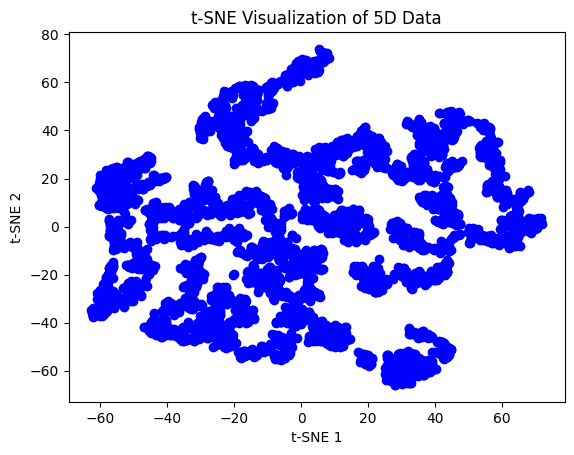

In [176]:
from sklearn.manifold import TSNE

# Reduce to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# Plot the 2D t-SNE result
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='b', marker='o')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of 5D Data')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


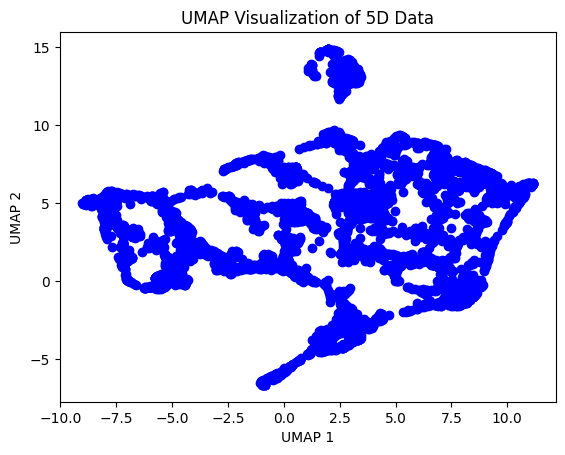

In [177]:
import umap

# Reduce to 2D using UMAP
umap_reducer = umap.UMAP(random_state=42)
X_umap = umap_reducer.fit_transform(X_pca)

# Plot the 2D UMAP result
plt.scatter(X_umap[:, 0], X_umap[:, 1], c='b', marker='o')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP Visualization of 5D Data')
plt.show()

In [18]:
import numpy as np
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from itertools import product
import matplotlib.pyplot as plt

# Assuming X is your normalized data
# X = ...  # Your data

# Define the parameter grid
param_grid = {
    'n_clusters': (2, 22),  # Number of clusters to try
    'affinity': ['nearest_neighbors', 'rbf'],  # Affinity metrics to try
    'gamma': [0.1, 1.0],  # Kernel coefficient for 'rbf'
    'n_neighbors': [5, 10]  # Number of neighbors for 'nearest_neighbors'
}

# Initialize variables to store results
best_score = -1
best_params = {}
results = []

# Perform grid search
for params in product(*param_grid.values()):
    n_clusters, affinity, gamma, n_neighbors = params

    # Set up SpectralClustering with current parameters
    if affinity == 'nearest_neighbors':
        spectral = SpectralClustering(
            n_clusters=n_clusters,
            affinity=affinity,
            n_neighbors=n_neighbors,  # Only pass n_neighbors for 'nearest_neighbors'
            random_state=42
        )
    elif affinity == 'rbf':
        spectral = SpectralClustering(
            n_clusters=n_clusters,
            affinity=affinity,
            gamma=gamma,  # Only pass gamma for 'rbf'
            random_state=42
        )

    # Fit the model and get cluster labels
    labels = spectral.fit_predict(X_pca)

    # Skip if all points are noise or only one cluster is found
    if len(np.unique(labels)) < 2:
        continue

    # Calculate Silhouette Score
    score = silhouette_score(X_pca, labels)

    # Store results
    results.append({
        'n_clusters': n_clusters,
        'affinity': affinity,
        'gamma': gamma if affinity == 'rbf' else None,
        'n_neighbors': n_neighbors if affinity == 'nearest_neighbors' else None,
        'silhouette_score': score
    })

    # Update best parameters
    if score > best_score:
        best_score = score
        best_params = {
            'n_clusters': n_clusters,
            'affinity': affinity,
            'gamma': gamma if affinity == 'rbf' else None,
            'n_neighbors': n_neighbors if affinity == 'nearest_neighbors' else None
        }

# Convert results to a DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Print the best parameters and score
print("Best Parameters:")
print(best_params)
print(f"Best Silhouette Score: {best_score:.4f}")

# Display the top 10 results
print("\nTop 10 Results:")
print(results_df.sort_values(by='silhouette_score', ascending=False).head(10))


Best Parameters:
{'n_clusters': 22, 'affinity': 'nearest_neighbors', 'gamma': None, 'n_neighbors': 10}
Best Silhouette Score: 0.2767

Top 10 Results:
    n_clusters           affinity  gamma  n_neighbors  silhouette_score
9           22  nearest_neighbors    NaN         10.0          0.276709
11          22  nearest_neighbors    NaN         10.0          0.276709
6            2                rbf    1.0          NaN          0.274029
7            2                rbf    1.0          NaN          0.274029
4            2                rbf    0.1          NaN          0.272146
5            2                rbf    0.1          NaN          0.272146
8           22  nearest_neighbors    NaN          5.0          0.268656
10          22  nearest_neighbors    NaN          5.0          0.268656
0            2  nearest_neighbors    NaN          5.0          0.216413
2            2  nearest_neighbors    NaN          5.0          0.216413
